# Cyclist bike-share - Case study 
<div style="text-align: right"> Paulo Argôlo - https://www.linkedin.com/in/pauloargolo/ </div>
<div style="text-align: right"> Germany, 08.08.2023 </div>

## This document is split into four sessions: 
1) Background and business task
2) Data frame creation, data clearning and data manipulation
3) Data analysis
4) Summary and recommendations

The data analysis will focus on understanding the behaivour of users called "casual" and will highlight differences in comparison to the the behaviour of the users called "member". At the end, we have a summary of the analysis and recommendations to the marketing team in order to fulfill the business task

### ---------------------------------------------------------------------------------------------------------------------------------
### 1) Background and business task

### Background: 
Cyclistic bike-share is a bike-share company in Chicago. The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. The request was made to understand how casual riders and annual members use Cyclistic bikes differently. 
### Business task: 
Generate insights and design a new marketing strategy to convert casual riders into annual members.

### Additional information: 
* The case study file is found under: https://d3c33hcgiwev3.cloudfront.net/aacF81H_TsWnBfNR_x7FIg_36299b28fa0c4a5aba836111daad12f1_DAC8-Case-Study-1.pdf?Expires=1691884800&Signature=Cf9DVBlnpDXL--Wla4wjwq0al7qIF86UdSylObESASEkbt~PjBVucnCaZ9ObxmZegA2j1FMrofw2spyytnwGKM84mOAfJbxgFNt2PVE9Id0vkl0MLDT-VdUz8LjvI4xUd5GMYxQYGhGLoWg7iJvvRPbtxigz0ltgnHLKo0MFcms_&Key-Pair-Id=APKAJLTNE6QMUY6HBC5A
* CSV files downloaded from: https://divvy-tripdata.s3.amazonaws.com/index.html
* license under: https://ride.divvybikes.com/data-license-agreement

### ---------------------------------------------------------------------------------------------------------------------------------
### 2) Data frame creation, data clearning and data manipulation

In [2]:
# we'll start by importing pandas, matplotlib and seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# we ahve 12 csv files, each one with information realted to one month starting in May 2022 and going till April 2023
file_path = r'C:\Users\pcarg\Desktop\Data Analytics\Google - Case study\Downloads\202205-divvy-tripdata.csv'
df_1 = pd.read_csv(file_path)

file_path = r'C:\Users\pcarg\Desktop\Data Analytics\Google - Case study\Downloads\202206-divvy-tripdata.csv'
df_2 = pd.read_csv(file_path)

file_path = r'C:\Users\pcarg\Desktop\Data Analytics\Google - Case study\Downloads\202207-divvy-tripdata.csv'
df_3 = pd.read_csv(file_path)

file_path = r'C:\Users\pcarg\Desktop\Data Analytics\Google - Case study\Downloads\202208-divvy-tripdata.csv'
df_4 = pd.read_csv(file_path)

file_path = r'C:\Users\pcarg\Desktop\Data Analytics\Google - Case study\Downloads\202209-divvy-publictripdata.csv'
df_5 = pd.read_csv(file_path)

file_path = r'C:\Users\pcarg\Desktop\Data Analytics\Google - Case study\Downloads\202210-divvy-tripdata.csv'
df_6 = pd.read_csv(file_path)

file_path = r'C:\Users\pcarg\Desktop\Data Analytics\Google - Case study\Downloads\202211-divvy-tripdata.csv'
df_7 = pd.read_csv(file_path)

file_path = r'C:\Users\pcarg\Desktop\Data Analytics\Google - Case study\Downloads\202212-divvy-tripdata.csv'
df_8 = pd.read_csv(file_path)

file_path = r'C:\Users\pcarg\Desktop\Data Analytics\Google - Case study\Downloads\202301-divvy-tripdata.csv'
df_9 = pd.read_csv(file_path)

file_path = r'C:\Users\pcarg\Desktop\Data Analytics\Google - Case study\Downloads\202302-divvy-tripdata.csv'
df_10 = pd.read_csv(file_path)

file_path = r'C:\Users\pcarg\Desktop\Data Analytics\Google - Case study\Downloads\202303-divvy-tripdata.csv'
df_11 = pd.read_csv(file_path)

file_path = r'C:\Users\pcarg\Desktop\Data Analytics\Google - Case study\Downloads\202304-divvy-tripdata.csv'
df_12 = pd.read_csv(file_path)

In [5]:
# checking checking info regarding null values and data types

df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634858 entries, 0 to 634857
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             634858 non-null  object 
 1   rideable_type       634858 non-null  object 
 2   started_at          634858 non-null  object 
 3   ended_at            634858 non-null  object 
 4   start_station_name  548154 non-null  object 
 5   start_station_id    548154 non-null  object 
 6   end_station_name    541687 non-null  object 
 7   end_station_id      541687 non-null  object 
 8   start_lat           634858 non-null  float64
 9   start_lng           634858 non-null  float64
 10  end_lat             634136 non-null  float64
 11  end_lng             634136 non-null  float64
 12  member_casual       634858 non-null  object 
dtypes: float64(4), object(9)
memory usage: 63.0+ MB


In [6]:
# checking how the first df looks like before putting them all together in one bog table

df_1.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,EC2DE40644C6B0F4,classic_bike,2022-05-23 23:06:58,2022-05-23 23:40:19,Wabash Ave & Grand Ave,TA1307000117,Halsted St & Roscoe St,TA1309000025,41.891466,-87.626761,41.943670,-87.648950,member
1,1C31AD03897EE385,classic_bike,2022-05-11 08:53:28,2022-05-11 09:31:22,DuSable Lake Shore Dr & Monroe St,13300,Field Blvd & South Water St,15534,41.880958,-87.616743,41.886349,-87.617517,member
2,1542FBEC830415CF,classic_bike,2022-05-26 18:36:28,2022-05-26 18:58:18,Clinton St & Madison St,TA1305000032,Wood St & Milwaukee Ave,13221,41.882242,-87.641066,41.907655,-87.672552,member
3,6FF59852924528F8,classic_bike,2022-05-10 07:30:07,2022-05-10 07:38:49,Clinton St & Madison St,TA1305000032,Clark St & Randolph St,TA1305000030,41.882242,-87.641066,41.884576,-87.631890,member
4,483C52CAAE12E3AC,classic_bike,2022-05-10 17:31:56,2022-05-10 17:36:57,Clinton St & Madison St,TA1305000032,Morgan St & Lake St,TA1306000015,41.882242,-87.641066,41.885779,-87.651025,member


In [7]:
# bringing everything together. In this case we don't need to use "ignore_index" because we'll use the ride_id as index
# will call our data frame as "bike share data frame" or bs_df for short
bs_df = pd.concat([df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9, df_10, df_11, df_12])

In [8]:
# ride_id is a unique value assigned to each ride and can be used as index in our data frame
bs_df.set_index(['ride_id'],inplace=True)

In [9]:
bs_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5859061 entries, EC2DE40644C6B0F4 to D29CB39B9E3FC46A
Data columns (total 12 columns):
 #   Column              Dtype  
---  ------              -----  
 0   rideable_type       object 
 1   started_at          object 
 2   ended_at            object 
 3   start_station_name  object 
 4   start_station_id    object 
 5   end_station_name    object 
 6   end_station_id      object 
 7   start_lat           float64
 8   start_lng           float64
 9   end_lat             float64
 10  end_lng             float64
 11  member_casual       object 
dtypes: float64(4), object(8)
memory usage: 581.1+ MB


In [10]:
# columns rideable_type and member_casual can be assigned as 'category'. This saves space and is good to use in this case
# since the data is so large
bs_df.rideable_type = bs_df.rideable_type.astype('category')
bs_df.member_casual = bs_df.member_casual.astype('category')

In [11]:
bs_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5859061 entries, EC2DE40644C6B0F4 to D29CB39B9E3FC46A
Data columns (total 12 columns):
 #   Column              Dtype   
---  ------              -----   
 0   rideable_type       category
 1   started_at          object  
 2   ended_at            object  
 3   start_station_name  object  
 4   start_station_id    object  
 5   end_station_name    object  
 6   end_station_id      object  
 7   start_lat           float64 
 8   start_lng           float64 
 9   end_lat             float64 
 10  end_lng             float64 
 11  member_casual       category
dtypes: category(2), float64(4), object(6)
memory usage: 502.9+ MB


In [12]:
# columns 'started_at' and 'ended_at' should be assigned as datetime instead of plain object
bs_df['started_at'] = pd.to_datetime(bs_df['started_at'])
bs_df['ended_at'] = pd.to_datetime(bs_df['ended_at'])

In [13]:
bs_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5859061 entries, EC2DE40644C6B0F4 to D29CB39B9E3FC46A
Data columns (total 12 columns):
 #   Column              Dtype         
---  ------              -----         
 0   rideable_type       category      
 1   started_at          datetime64[ns]
 2   ended_at            datetime64[ns]
 3   start_station_name  object        
 4   start_station_id    object        
 5   end_station_name    object        
 6   end_station_id      object        
 7   start_lat           float64       
 8   start_lng           float64       
 9   end_lat             float64       
 10  end_lng             float64       
 11  member_casual       category      
dtypes: category(2), datetime64[ns](2), float64(4), object(4)
memory usage: 502.9+ MB


In [14]:
# let's create the column duration which will be one of the key metrics in our analysis in session 2
bs_df['duration'] = bs_df['ended_at'] - bs_df['started_at']

In [15]:
bs_df.head()
# everything looks nice but we still have many null values

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration
ride_id,,,,,,,,,,,,,
EC2DE40644C6B0F4,classic_bike,2022-05-23 23:06:58,2022-05-23 23:40:19,Wabash Ave & Grand Ave,TA1307000117,Halsted St & Roscoe St,TA1309000025,41.891466,-87.626761,41.943670,-87.648950,member,0 days 00:33:21
1C31AD03897EE385,classic_bike,2022-05-11 08:53:28,2022-05-11 09:31:22,DuSable Lake Shore Dr & Monroe St,13300,Field Blvd & South Water St,15534,41.880958,-87.616743,41.886349,-87.617517,member,0 days 00:37:54
1542FBEC830415CF,classic_bike,2022-05-26 18:36:28,2022-05-26 18:58:18,Clinton St & Madison St,TA1305000032,Wood St & Milwaukee Ave,13221,41.882242,-87.641066,41.907655,-87.672552,member,0 days 00:21:50
6FF59852924528F8,classic_bike,2022-05-10 07:30:07,2022-05-10 07:38:49,Clinton St & Madison St,TA1305000032,Clark St & Randolph St,TA1305000030,41.882242,-87.641066,41.884576,-87.631890,member,0 days 00:08:42
483C52CAAE12E3AC,classic_bike,2022-05-10 17:31:56,2022-05-10 17:36:57,Clinton St & Madison St,TA1305000032,Morgan St & Lake St,TA1306000015,41.882242,-87.641066,41.885779,-87.651025,member,0 days 00:05:01


In [16]:
# checking number of rows containing at least one value as null
print('complete data set: ', bs_df.shape[0])
print('removing nulls: ', bs_df.dropna().shape[0])
print('percentage: ', bs_df.dropna().shape[0]/bs_df.shape[0]*100,'%')
# we lose a substantial number of rows but keep the ones that provide good data to work with

complete data set:  5859061
removing nulls:  4533999
percentage:  77.38439657822302 %


In [17]:
bs_df = bs_df.dropna()

In [18]:
# bs_df.info()
bs_df.head()

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration
ride_id,,,,,,,,,,,,,
EC2DE40644C6B0F4,classic_bike,2022-05-23 23:06:58,2022-05-23 23:40:19,Wabash Ave & Grand Ave,TA1307000117,Halsted St & Roscoe St,TA1309000025,41.891466,-87.626761,41.943670,-87.648950,member,0 days 00:33:21
1C31AD03897EE385,classic_bike,2022-05-11 08:53:28,2022-05-11 09:31:22,DuSable Lake Shore Dr & Monroe St,13300,Field Blvd & South Water St,15534,41.880958,-87.616743,41.886349,-87.617517,member,0 days 00:37:54
1542FBEC830415CF,classic_bike,2022-05-26 18:36:28,2022-05-26 18:58:18,Clinton St & Madison St,TA1305000032,Wood St & Milwaukee Ave,13221,41.882242,-87.641066,41.907655,-87.672552,member,0 days 00:21:50
6FF59852924528F8,classic_bike,2022-05-10 07:30:07,2022-05-10 07:38:49,Clinton St & Madison St,TA1305000032,Clark St & Randolph St,TA1305000030,41.882242,-87.641066,41.884576,-87.631890,member,0 days 00:08:42
483C52CAAE12E3AC,classic_bike,2022-05-10 17:31:56,2022-05-10 17:36:57,Clinton St & Madison St,TA1305000032,Morgan St & Lake St,TA1306000015,41.882242,-87.641066,41.885779,-87.651025,member,0 days 00:05:01


In [19]:
# Let's check how many rows we have with 'duration' greater than 1 day. This should not be common for a bike share service
bs_df[bs_df['duration'] > '1 days'].sort_values(by='duration', ascending=False).head()
# I'll remove these rows from the data as they don't make sense and are likely an error

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration
ride_id,,,,,,,,,,,,,
DC510E6F98003A94,docked_bike,2022-07-04 18:37:11,2022-07-27 00:32:38,DuSable Lake Shore Dr & Monroe St,13300,Green St & Randolph St*,chargingstx3,41.880958,-87.616743,41.883602,-87.648627,casual,22 days 05:55:27
E5886B2D636415DF,docked_bike,2022-07-10 18:52:42,2022-07-18 06:59:55,DuSable Lake Shore Dr & Monroe St,13300,Bissell St & Armitage Ave*,chargingstx1,41.880958,-87.616743,41.918296,-87.652183,casual,7 days 12:07:13
84C8FD571931B767,docked_bike,2022-05-09 10:58:35,2022-05-16 21:41:33,Leavitt St & Archer Ave,KA1503000068,Bissell St & Armitage Ave*,chargingstx1,41.828792,-87.680604,41.918296,-87.652183,casual,7 days 10:42:58
17405F31D17313B2,docked_bike,2022-07-22 13:07:51,2022-07-29 11:10:12,Dusable Harbor,KA1503000064,Green St & Randolph St*,chargingstx3,41.886976,-87.612813,41.883602,-87.648627,casual,6 days 22:02:21
B139FE7DF42819B0,docked_bike,2022-10-24 14:37:54,2022-10-30 08:01:42,Field Museum,13029,Bissell St & Armitage Ave*,chargingstx1,41.865312,-87.617867,41.918296,-87.652183,casual,5 days 17:23:48


In [20]:
# let's also see how many rows have duration below 3 minutes. These values should also be removed as they don't make sense and are likely to be an error in the data
len(bs_df[bs_df['duration'] < '00:03:00'].sort_values(by='duration', ascending=False))

333467

In [21]:
# checking the number of entries coming from these potential errors realted to duration
bs_df[(bs_df['duration'] < '1 days') & (bs_df['duration'] >= '00:03:00')].info()

<class 'pandas.core.frame.DataFrame'>
Index: 4200433 entries, EC2DE40644C6B0F4 to 210B2ED6583DC231
Data columns (total 13 columns):
 #   Column              Dtype          
---  ------              -----          
 0   rideable_type       category       
 1   started_at          datetime64[ns] 
 2   ended_at            datetime64[ns] 
 3   start_station_name  object         
 4   start_station_id    object         
 5   end_station_name    object         
 6   end_station_id      object         
 7   start_lat           float64        
 8   start_lng           float64        
 9   end_lat             float64        
 10  end_lng             float64        
 11  member_casual       category       
 12  duration            timedelta64[ns]
dtypes: category(2), datetime64[ns](2), float64(4), object(4), timedelta64[ns](1)
memory usage: 392.6+ MB


In [22]:
# filtering them out of the data frame we'll analyze
bs_df = bs_df[(bs_df['duration'] < '1 days') & (bs_df['duration'] >= '00:03:00')]

In [23]:
# we have columns with longitude and latitude which could deliver us great insights if we could analyze the distance between them
# I propted chatGPT and got the code below to return the distance in km between start and end of each ride

########### code created by chatGPT to return distance in km between start and end:
from math import radians, sin, cos, sqrt, atan2

# Create a function to calculate the distance between two sets of latitude and longitude coordinates
def calculate_distance(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    # Haversine formula to calculate distance
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    radius_of_earth_km = 6371.0  # Earth's radius in kilometers
    distance = radius_of_earth_km * c

    return distance

# Assuming you already have the DataFrame 'bs_df' with the data
bs_df['distance_km'] = bs_df.apply(lambda row: calculate_distance(row['start_lat'], row['start_lng'], row['end_lat'], row['end_lng']), axis=1)

In [24]:
bs_df.head()
# nice! it worked very well. I checked the first row against a website and the result matches 

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration,distance_km
ride_id,,,,,,,,,,,,,,
EC2DE40644C6B0F4,classic_bike,2022-05-23 23:06:58,2022-05-23 23:40:19,Wabash Ave & Grand Ave,TA1307000117,Halsted St & Roscoe St,TA1309000025,41.891466,-87.626761,41.943670,-87.648950,member,0 days 00:33:21,6.088235
1C31AD03897EE385,classic_bike,2022-05-11 08:53:28,2022-05-11 09:31:22,DuSable Lake Shore Dr & Monroe St,13300,Field Blvd & South Water St,15534,41.880958,-87.616743,41.886349,-87.617517,member,0 days 00:37:54,0.602870
1542FBEC830415CF,classic_bike,2022-05-26 18:36:28,2022-05-26 18:58:18,Clinton St & Madison St,TA1305000032,Wood St & Milwaukee Ave,13221,41.882242,-87.641066,41.907655,-87.672552,member,0 days 00:21:50,3.844073
6FF59852924528F8,classic_bike,2022-05-10 07:30:07,2022-05-10 07:38:49,Clinton St & Madison St,TA1305000032,Clark St & Randolph St,TA1305000030,41.882242,-87.641066,41.884576,-87.631890,member,0 days 00:08:42,0.802763
483C52CAAE12E3AC,classic_bike,2022-05-10 17:31:56,2022-05-10 17:36:57,Clinton St & Madison St,TA1305000032,Morgan St & Lake St,TA1306000015,41.882242,-87.641066,41.885779,-87.651025,member,0 days 00:05:01,0.913438


In [25]:
# at this stage we can get rid of some columns that will not be used in our analysis
bs_df2 = bs_df.drop(['start_station_id','end_station_id','start_lat','start_lng','end_lat','end_lng'],axis=1)

In [26]:
bs_df2.head()
# much leaner!

,rideable_type,started_at,ended_at,start_station_name,end_station_name,member_casual,duration,distance_km
ride_id,,,,,,,,
EC2DE40644C6B0F4,classic_bike,2022-05-23 23:06:58,2022-05-23 23:40:19,Wabash Ave & Grand Ave,Halsted St & Roscoe St,member,0 days 00:33:21,6.088235
1C31AD03897EE385,classic_bike,2022-05-11 08:53:28,2022-05-11 09:31:22,DuSable Lake Shore Dr & Monroe St,Field Blvd & South Water St,member,0 days 00:37:54,0.602870
1542FBEC830415CF,classic_bike,2022-05-26 18:36:28,2022-05-26 18:58:18,Clinton St & Madison St,Wood St & Milwaukee Ave,member,0 days 00:21:50,3.844073
6FF59852924528F8,classic_bike,2022-05-10 07:30:07,2022-05-10 07:38:49,Clinton St & Madison St,Clark St & Randolph St,member,0 days 00:08:42,0.802763
483C52CAAE12E3AC,classic_bike,2022-05-10 17:31:56,2022-05-10 17:36:57,Clinton St & Madison St,Morgan St & Lake St,member,0 days 00:05:01,0.913438


In [27]:
# taking a look at the data between rows 100 and 150 to check how the final data frame looks like before analysis
bs_df2.iloc[100:150]

,rideable_type,started_at,ended_at,start_station_name,end_station_name,member_casual,duration,distance_km
ride_id,,,,,,,,
2534F2DEDDA76B08,electric_bike,2022-05-20 17:57:46,2022-05-20 18:23:18,Wells St & Elm St,Milwaukee Ave & Wabansia Ave,member,0 days 00:25:32,4.004783
8A45E3410C41EADD,classic_bike,2022-05-08 08:51:21,2022-05-08 09:01:08,Halsted St & Wrightwood Ave,Halsted St & Clybourn Ave,member,0 days 00:09:47,2.166944
DC9E06307391C25F,electric_bike,2022-05-07 16:21:01,2022-05-07 16:24:30,Indiana Ave & 31st St,Calumet Ave & 35th St,member,0 days 00:03:29,0.882807
50C03147538637F1,classic_bike,2022-05-07 20:47:19,2022-05-07 20:52:30,State St & Randolph St,LaSalle St & Washington St,casual,0 days 00:05:11,0.445505
7C7FC0C885010F0B,electric_bike,2022-05-07 13:41:56,2022-05-07 13:54:03,Cottage Grove Ave & 47th St,Calumet Ave & 35th St,member,0 days 00:12:07,2.572275
85F7CF7C72209A29,docked_bike,2022-05-28 15:54:50,2022-05-28 15:59:44,Wood St & Milwaukee Ave,Wood St & Augusta Blvd,casual,0 days 00:04:54,0.942716
57E346CA2199EE94,classic_bike,2022-05-29 18:14:16,2022-05-29 19:53:14,Lincoln Ave & Addison St,Shedd Aquarium,casual,0 days 01:38:58,10.003421
A94AC7F66B30C3DE,electric_bike,2022-05-20 07:23:59,2022-05-20 07:37:04,Fullerton & Monitor,Mulligan Ave & Wellington Ave,member,0 days 00:13:05,1.385957
6889D1634BD6484A,electric_bike,2022-05-08 08:23:05,2022-05-08 08:26:20,Clark St & Drummond Pl,Larrabee St & Webster Ave,member,0 days 00:03:15,1.048116


In [30]:
# adding month as a column to be used in the analysis
df['month'] = df['started_at'].dt.month

In [66]:
# creating a function to idenfify the period of the day when the ride took place
def period_of_day(h):
    if h.hour < 7:
        return '4.night'
    elif 7 <= h.hour < 12:
        return '1.morning'
    elif 12 <= h.hour < 18:
        return '2.afternoon'
    elif 18 <= h.hour < 22:
        return '3.evening'
    else:
        return '4.night'

In [196]:
# applying the function to the data frame
df['period'] = df['started_at'].apply(period_of_day)

In [189]:
# creating a function to idenfify the season of the year when the ride took place
def season_of_year(m):
    if m <= 2:
        return '1.Winter'
    elif 3 <= m <= 5:
        return '2.Spring'
    elif 6 <= m <= 8:
        return '3.Summer'
    elif 9 <= m <= 11:
        return '4.Fall'
    else:
        return '1.Winter'

In [195]:
# applying the function to the data frame
df['season'] = df['month'].apply(season_of_year)

In [198]:
df[['started_at','period','season']]
# looks good

,started_at,period,season
ride_id,,,
EC2DE40644C6B0F4,2022-05-23 23:06:58,4.night,2.Spring
1C31AD03897EE385,2022-05-11 08:53:28,1.morning,2.Spring
1542FBEC830415CF,2022-05-26 18:36:28,3.evening,2.Spring
6FF59852924528F8,2022-05-10 07:30:07,1.morning,2.Spring
483C52CAAE12E3AC,2022-05-10 17:31:56,2.afternoon,2.Spring
...,...,...,...
A17D800CE963661A,2023-04-11 15:46:42,2.afternoon,2.Spring
8B441A6C436E9900,2023-04-29 21:20:21,3.evening,2.Spring
3980D64BE11540F1,2023-04-24 09:16:05,1.morning,2.Spring


### ---------------------------------------------------------------------------------------------------------------------------------
### 3) Data analysis
In this session I also added some comments after each chart to summarize the visualization

In [28]:
# I'll change the data frame name to make it easier in the next lines
df= bs_df2

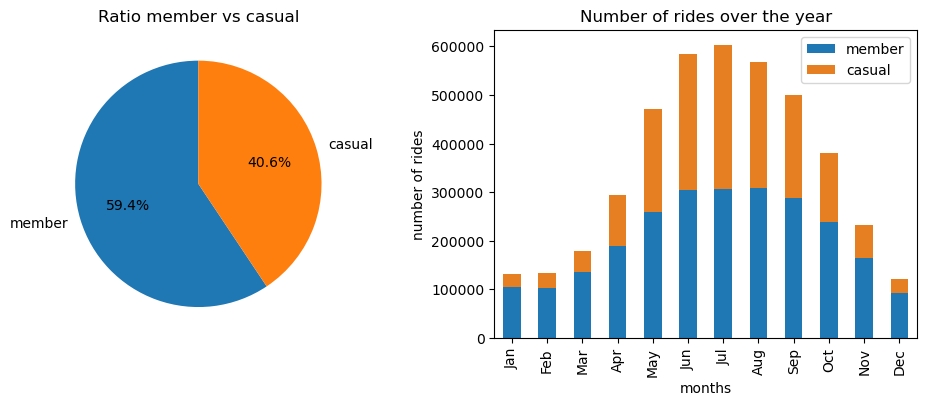

In [46]:
# checking the ratio between members and casual riders, first over all and then over the 12 months

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
colors = ['#2980b9','#e67e22']
user_share = df['member_casual'].value_counts()
plt.pie(user_share,labels=user_share.index,autopct='%1.1f%%',startangle=90)
plt.title('Ratio member vs casual')

plt.subplot(1,2,2)
months_dict = {1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun", 7:"Jul", 8: "Aug", 9:"Sep", 10: "Oct", 11: "Nov", 12: "Dec"}
month_use_member = df[df['member_casual'] == 'member']['month'].value_counts().sort_index()
month_use_member.rename(months_dict).plot(kind='bar',label='member')
month_use_casual = df[df['member_casual'] == 'casual']['month'].value_counts().sort_index()
month_use_casual.rename(months_dict).plot(kind='bar',label='casual',color='#e67e22',bottom=month_use_member)
plt.xlabel('months')
plt.ylabel('number of rides')
plt.title('Number of rides over the year')
plt.legend()
plt.show()

* From the two charts above we can easily see that a highest number of rides is coming from the members.
* We can also see that the number of rides is on a similar level between June and August but all other months
have a much higher number of rides from members
* Both types of user have higher number of rides between April and September

In [183]:
import matplotlib.pyplot as plt

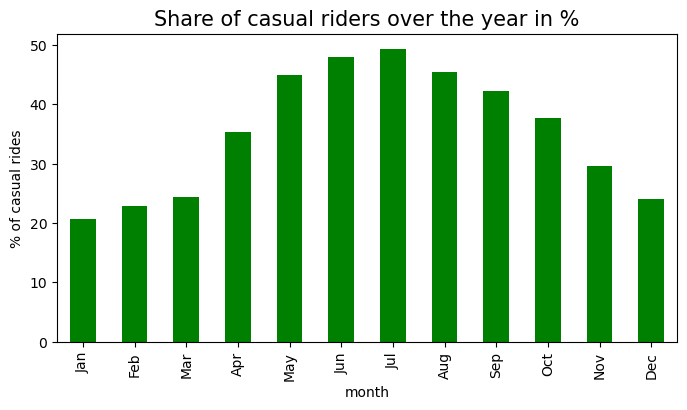

In [187]:
plt.figure(figsize=(8,4))
count_month = df[['month','member_casual']].value_counts().sort_index().unstack()
count_month['percentage_casual'] = count_month['casual']/(count_month['casual'] + count_month['member'])*100
months_dict = {1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun", 7:"Jul", 8: "Aug", 9:"Sep", 10: "Oct", 11: "Nov", 12: "Dec"}
count_month['percentage_casual'].rename(months_dict).plot(kind='bar',
                                                          color='green',
                                                          ylabel='% of casual rides')
plt.title('Share of casual riders over the year in %', fontsize=15)
plt.show()

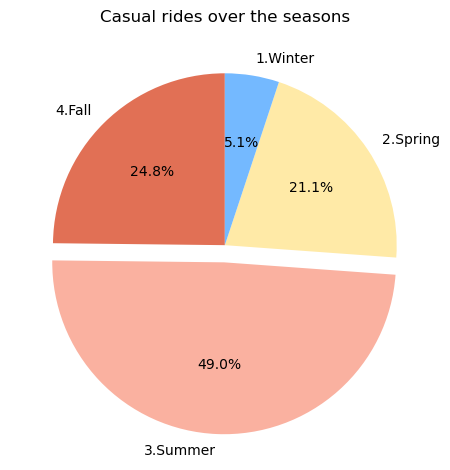

In [229]:
# checking the ratio between members and casual riders, first over all and then over the 12 months

plt.figure()

season = df[df['member_casual'] == 'casual']['season'].value_counts()
order = ['1.Winter', '2.Spring', '3.Summer', '4.Fall']


# The next two lines were given after prompting chatGPT to reorder the 'season' Series. Clockwise reads better
season_ordered = season.reindex(order)
season_ordered = season_ordered[::-1]

colors=['#e17055','#fab1a0','#ffeaa7','#74b9ff']
plt.pie(season_ordered, labels=season_ordered.index, autopct='%1.1f%%', startangle=90,explode=(0,0.1,0,0),colors=colors)
plt.title('Casual rides over the seasons')

plt.tight_layout()
plt.show()

* From May through August the percentage of riders registered from casual riders is close to 50% of the total number of tires even though we saw in the previous pie chart that they represent round 40% of the total riders. This shows an increase in these months which can be related to the higher temperatures and nicer weather in Chicago

In [32]:
# pandas, matplotlib and seaborn can't handle timedelta64[ns]. I need to create a new column with timedelta[m] to proceed with the analysis. It should be fine for the analysis
df['duration2'] = df.duration.astype('timedelta64[m]')

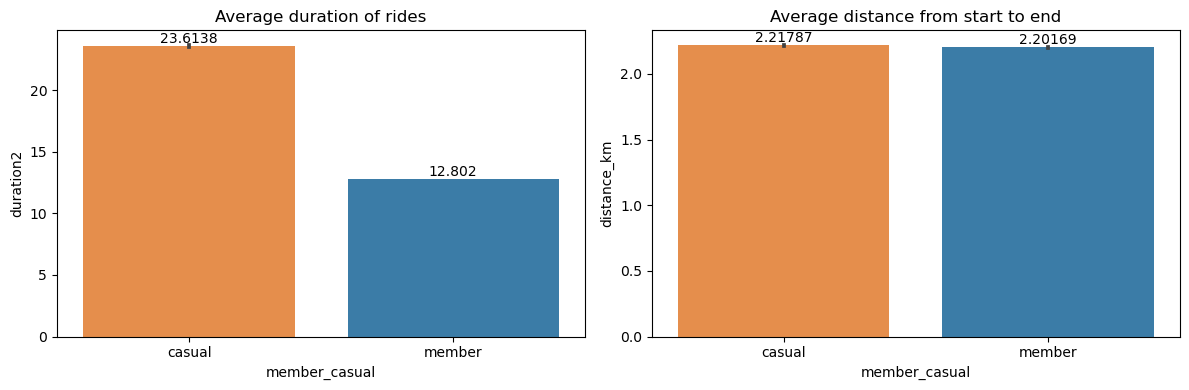

In [149]:
# checking average duration of rides per user type and also the average distance between start and end

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
ax = sns.barplot(data=df,x='member_casual',y='duration2', palette=['#FF8B32','#2980b9']) # default is mean so all good
plt.title('Average duration of rides')
# adding the values at the top of the bars
ax.bar_label(ax.containers[0])

plt.subplot(1,2,2)
ay = sns.barplot(data=df,x='member_casual',y='distance_km', palette=['#FF8B32','#2980b9']) # default is mean
plt.title('Average distance from start to end')
# adding the values at the top of the bars
ay.bar_label(ay.containers[0])

plt.tight_layout()
plt.show()

* From the chart above we can see that the casual riders have much longer duration rides on average when comparing to the members
* The average distance between pickup and dropoff is nearly the same between the two groups

<Axes: xlabel='distance_km', ylabel='duration2'>

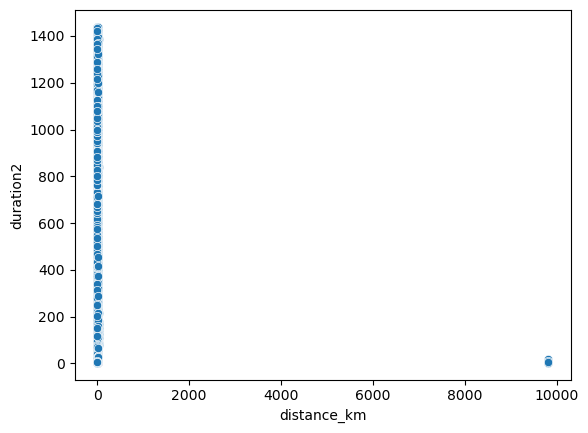

In [150]:
sns.scatterplot(data=df,x='distance_km',y='duration2')

In [34]:
df[df['distance_km'] > 1000]

,rideable_type,started_at,ended_at,start_station_name,end_station_name,member_casual,duration,distance_km,month,duration2
ride_id,,,,,,,,,,
3B47B333C0D186F0,classic_bike,2022-11-09 13:39:03,2022-11-09 13:44:38,Franklin St & Adams St (Temp),Green St & Madison Ave*,member,0 days 00:05:35,9811.810795,11,5.0
42AF82C53D831251,electric_bike,2022-11-09 16:17:40,2022-11-09 16:38:06,Laflin St & Cullerton St,Green St & Madison Ave*,casual,0 days 00:20:26,9814.069405,11,20.0
BB8AA29838266294,classic_bike,2022-11-09 11:32:53,2022-11-09 11:37:30,Canal St & Adams St,Green St & Madison Ave*,member,0 days 00:04:37,9812.174386,11,4.0
6AFE1471227BD76F,classic_bike,2022-11-09 16:17:16,2022-11-09 16:26:17,Morgan St & Polk St,Green St & Madison Ave*,casual,0 days 00:09:01,9813.072285,11,9.0
E9495F1DC3475D41,classic_bike,2022-11-09 12:21:55,2022-11-09 12:26:18,Aberdeen St & Randolph St,Green St & Madison Ave*,member,0 days 00:04:23,9813.377581,11,4.0
0A6988FE859F4D54,classic_bike,2022-11-09 10:58:37,2022-11-09 11:06:21,LaSalle St & Jackson Blvd,Green St & Madison Ave*,member,0 days 00:07:44,9811.511040,11,7.0


### Important: Looking at the scatter plot and the data frame above we can notice there are some points close to 10.000 km with ride rudation under 10 minutes. This is very unrealistic and this is why I'll filter these rows out

In [36]:
df = df[df['distance_km'] < 1000]

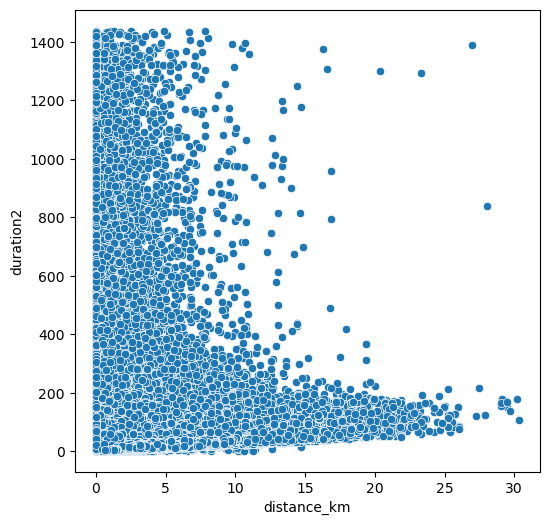

In [176]:
# let's run the scatter plot again
plt.figure(figsize=(6,6))
sns.scatterplot(data=df,x='distance_km',y='duration2')
plt.title='Distribution between ride duration and \n distance between pickup and drop off'

* in the plot above I tried running " hue='member-casual' " but there are so many data points that my machine could not compute. I still want to understand which group is more likely to return the shared bikes at the same location

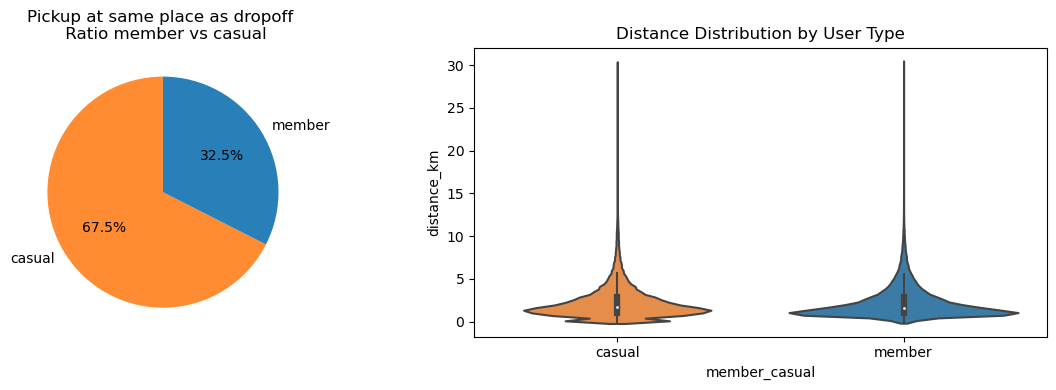

In [144]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
colors = ['#FF8B32', '#2980b9']
pickup_at_dropoff = df[df['distance_km'] == 0]['member_casual'].sort_index(ascending=True).value_counts()
plt.pie(pickup_at_dropoff, labels=pickup_at_dropoff.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Pickup at same place as dropoff \n Ratio member vs casual')

plt.subplot(1, 2, 2)
sns.violinplot(data=df, x='member_casual', y='distance_km', palette=colors)
plt.title('Distance Distribution by User Type')

plt.tight_layout()
plt.show()

* The pie chart on the left tells us that casual member are much more likely to return their shared bikes at the same location where they picked them up. This is validated in the violin plot on the right were we can see a wider base.
* This behaviour indicates that the casual riders use the bikes on their free time when they come back to same place where their started. Different from members where they use the bikes to go some where else
* The violin chart on the right shows us that both types of user have their max distance in km close to 30.

<Figure size 1200x400 with 0 Axes>

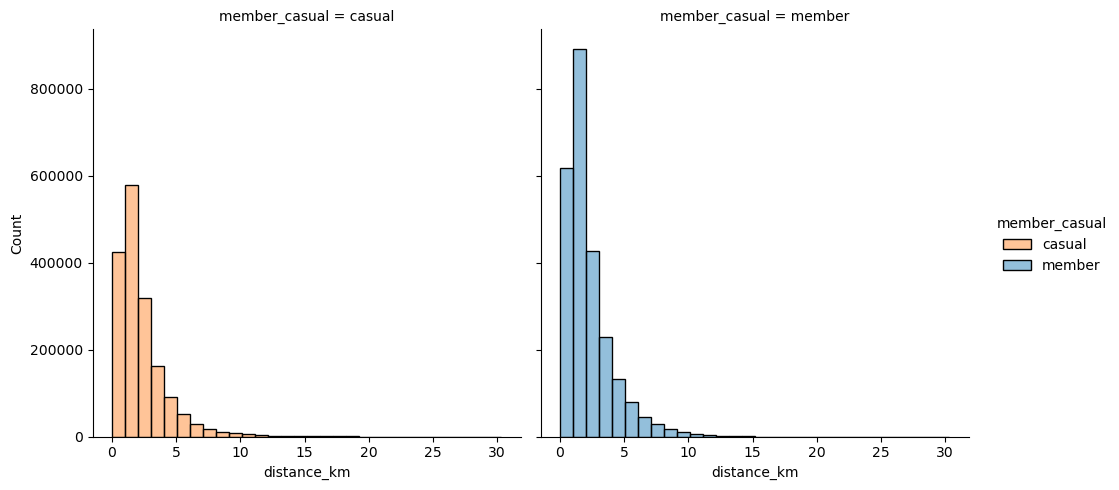

In [102]:
# another interesting way we can visualize the distance between pickup and dropoff is using a histogram
plt.figure(figsize=(12, 4))
colors = ['#FF8B32','#2980b9']
sns.displot(data=df,x='distance_km',bins=30,hue='member_casual',col='member_casual',palette=colors)
plt.show()

Text(0.5, 1.0, 'Count of Rides by Period and User Type')

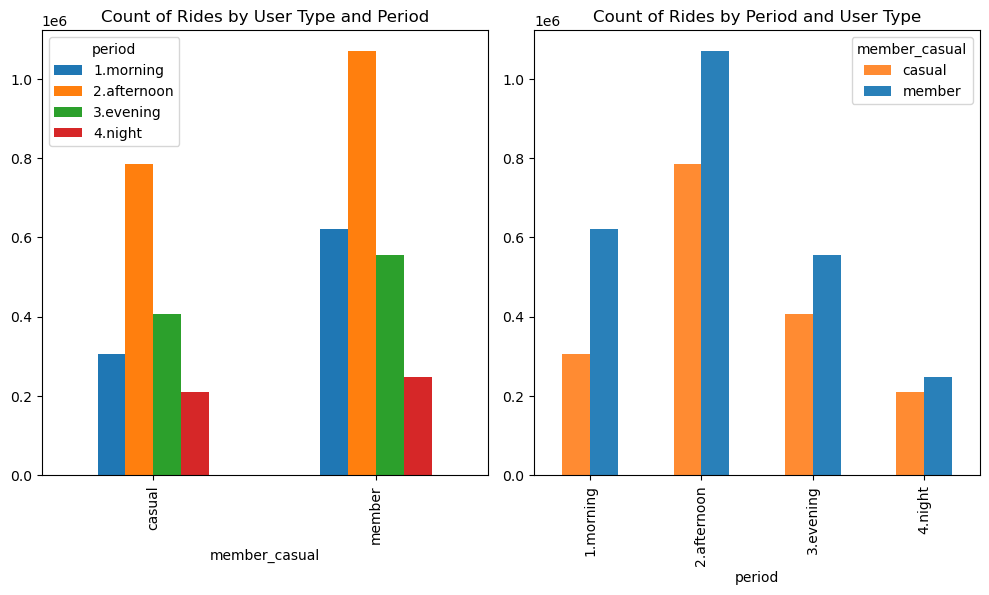

In [101]:
fig, axs = plt.subplots(1,2,figsize=(10,6))
df[['member_casual','period']].value_counts().sort_index().unstack().plot(kind='bar',ax=axs[0])
colors = ['#FF8B32','#2980b9']
df[['period','member_casual']].value_counts().sort_index().unstack().plot(kind='bar',ax=axs[1],color=colors)
plt.tight_layout()
axs[0].set_title('Count of Rides by User Type and Period')
axs[1].set_title('Count of Rides by Period and User Type')

* The charts above show the behaviour of members and casual riders over the hours of the day.
* Both groups have a greater number of rides during the afternoon period, followed by the evening

<Figure size 1000x600 with 0 Axes>

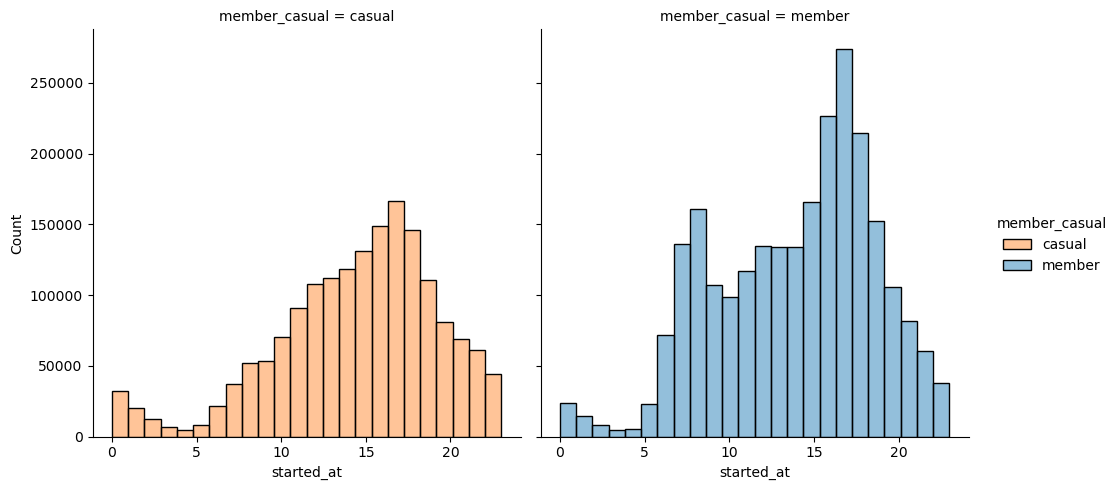

In [129]:
plt.figure(figsize=(10, 6))
colors = ['#FF8B32','#2980b9']
sns.displot(data=df, x=df['started_at'].dt.hour,hue='member_casual',col='member_casual',bins=24,palette=colors)

plt.show()

* From the right histogram above we can see that members ahve two peeks during the day, first at 8:00 then at 17:00. This indicates that this group uses the shared bikes to commute to and from work
* Looking at the histogram on the left, casual riders, we don't see the same behaviour. There is only one peek at 17:00, which would suggest that this group uses bikes on free time after work. If this is the case, maybe these users are not alone and offering a group subscription could be attrative for them.

In [230]:
df['day_of_week'] = df['started_at'].dt.dayofweek

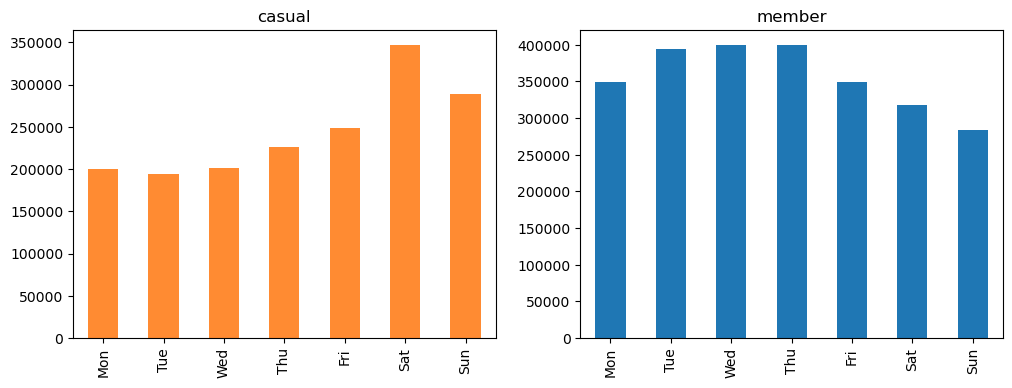

In [148]:
# let's also see the behaivour of each trype of user during the week
plt.figure(figsize=(12,4))
#colors = ['#FF8B32','#2980b9']
plt.subplot(1,2,1)
days_dict = {0: "Mon", 1: "Tue", 2: "Wed", 3: "Thu", 4: "Fri", 5: "Sat", 6:"Sun"}
days_dict = {0: "Mon", 1: "Tue", 2: "Wed", 3: "Thu", 4: "Fri", 5: "Sat", 6:"Sun"}
days = df[df['member_casual'] == 'casual']['day_of_week'].value_counts().sort_index()
days.rename(days_dict).plot(kind='bar',title='casual',color='#FF8B32')
plt.xlabel='days of week'
plt.ylabel='number of rides'


plt.subplot(1,2,2)
days = df[df['member_casual'] == 'member']['day_of_week'].value_counts().sort_index()
days.rename(days_dict).plot(kind='bar',title='member')
plt.xlabel='days of week'
plt.ylabel='number of rides'


* The bar chart on the left shows the behaviour of casual riders and we can see an increase of the number of rides towards the weekends, starting already on Thrusdays. This indicates that this type of users use the shared bikes in their free time
* On the otherhand, the members have their highest volume of rides over the working days of the week. It's likely that their using the shared bike to commute to and from work. 
* These insights supports the assumptions created from previous charts created.

### ---------------------------------------------------------------------------------------------------------------------------------
### 4) Summary and recommendations

##### Observations:
Regarding the behaviour of casual riders and how they differ from members we can highlight:
* Casual riders have almost 50% of the total number of rides during summer, which can be related to the higher temperatures and nicer weather in Chicago
* Rides registered by casual riders are almost twice as long as the rides from members, perhaps going on bike tours rather than going to an appointment
* Around 67% of all riders that have the end station at the start location are done by casual riders, which suggests that it's a bike tour not going for an appointment
* Casual riders register most of their riders in the afternoon followed by the evening
* When we look at the hours of the day, the peak for casual riders happens at 17:00. This can relate to the free time after work
* The top three days of the week with highetst volume of rides registered by casual riders are Saturday, Sunday then Friday, while for members it's Thrusday, Wednesday and Tuesday.

These insights leads me to believe that casual riders use Cyclist more for fun as a hobby in their free time and when the weather is favorable, while members use the service as their means of transportation to commute to and from work. This can explain why the year-round is not so attractive to the casual riders.

##### Recommendations:
Based on the observations above, I would give the following recommendations to the marketing team:
1) Create membership plan for 6-months instead of only 12-months. The price would be reduce thus more attractive but above 50% of the yearly subscription to compensate for the fix costs.
2) Create membership plans with restrictions that meet the casual riders profil: Ride only on weekends, ride only between 16:00 and 22:00.
3) Create group membership plan for reduced price in comparison to total individual price. This might be very attractive because using the share bike for fun can be an activity done with friends and family.
4) Create the idea of belonging to a club if you are a member and motivate people to share it on social media using hashtags #teamCyclist #teamSustantability #teamFitness